In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv('./data/data.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1) Problem statement
- This Project understands how test scores are getting affected by change in other variables like Gender, race_ethnicity, parental_level_of_education, lunch etc

###  2) Dataset Information


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [94]:
data.shape

(1000, 8)

### 2.1 Data checks to Perform
- Check Missing Values
- Check Duplicate Values
- Check Unique Values in each Column
- Check various categories in categorical variables
- Check Statistics of Dataset

In [95]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [96]:
data.duplicated().sum()

0

In [97]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [98]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [99]:
data.race_ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [100]:
data.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [101]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [102]:
data.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [103]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- Number of Missing Values = 0
- Number of Duplicate Values = 0
- Number of Unique Values in Each Columns
    - gender                           2
    - race_ethnicity                   5
    - parental_level_of_education      6
    - lunch                            2
    - test_preparation_course          2
- Number of Categories in Categorical Variables
    - gender : 2
    - race_ethnicity : 5
    - parental_level_of_education : 6
    - lunch : 2
    - test_preparation_course : 2
- Statistics of Data
    - From above description, the mean of all the columns is close to each other
    - standard deviation is also almost close between 14.5 to 15.2
    - Them Min number of marks in math is 0 while in Reading and Writing are 17 and 10 respectively

# Feature Engineering

In [106]:
numberical_variables = [feature for feature in data.columns if data[feature].dtype != 'O']
numberical_variables


['math_score', 'reading_score', 'writing_score']

In [107]:
categorical_variables = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_variables


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Number of Numerical and Categorical Features
    - Numerical : 3
    - Categorical : 5

In [108]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [109]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

data['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [110]:
data['average'] = data['total_score']/3

data['average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average, Length: 1000, dtype: float64

In [111]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Created Columns for total_score and average

In [114]:
math_full = data[data['math_score'] == 100]['average'].count()
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
total_full = data[data['total_score'] == 300]['average'].count()
print('Number of Students having full marks in math : ', math_full)
print('Number of Students having full marks in reading : ', reading_full)
print('Number of Students having full marks in writing : ', writing_full)
print('Number of Students full total marks : ', total_full)

Number of Students having full marks in math :  7
Number of Students having full marks in reading :  17
Number of Students having full marks in writing :  14
Number of Students full total marks :  3


In [115]:
data['total_score'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total_score, dtype: float64

### 3) Exploring Data (Visualization)

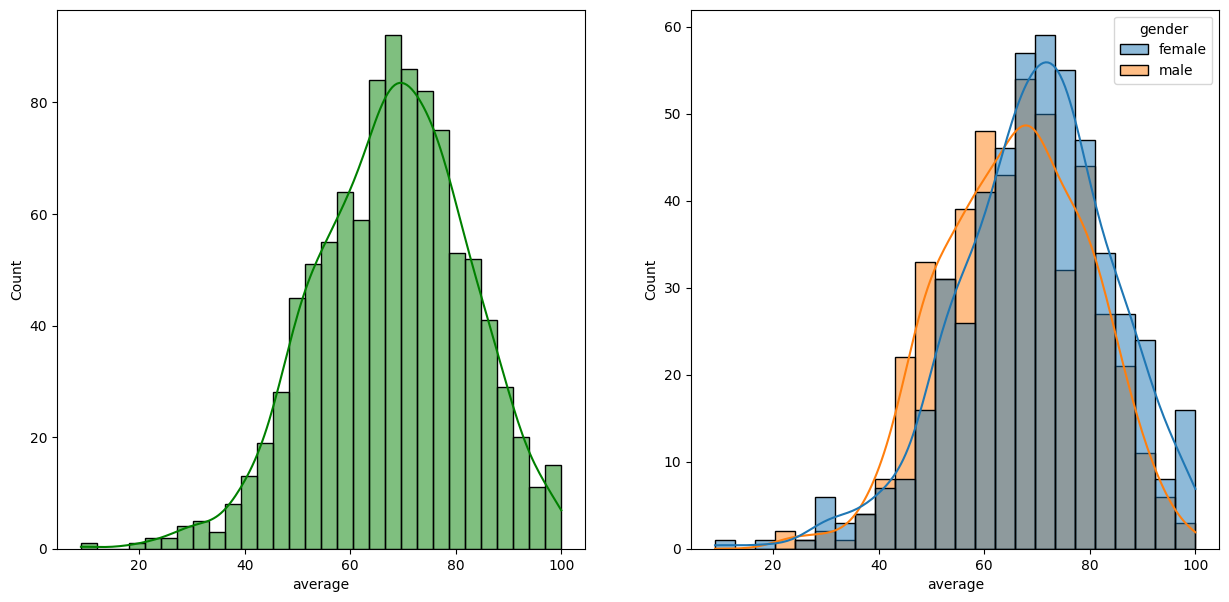

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average', kde=True, hue='gender')
plt.show()

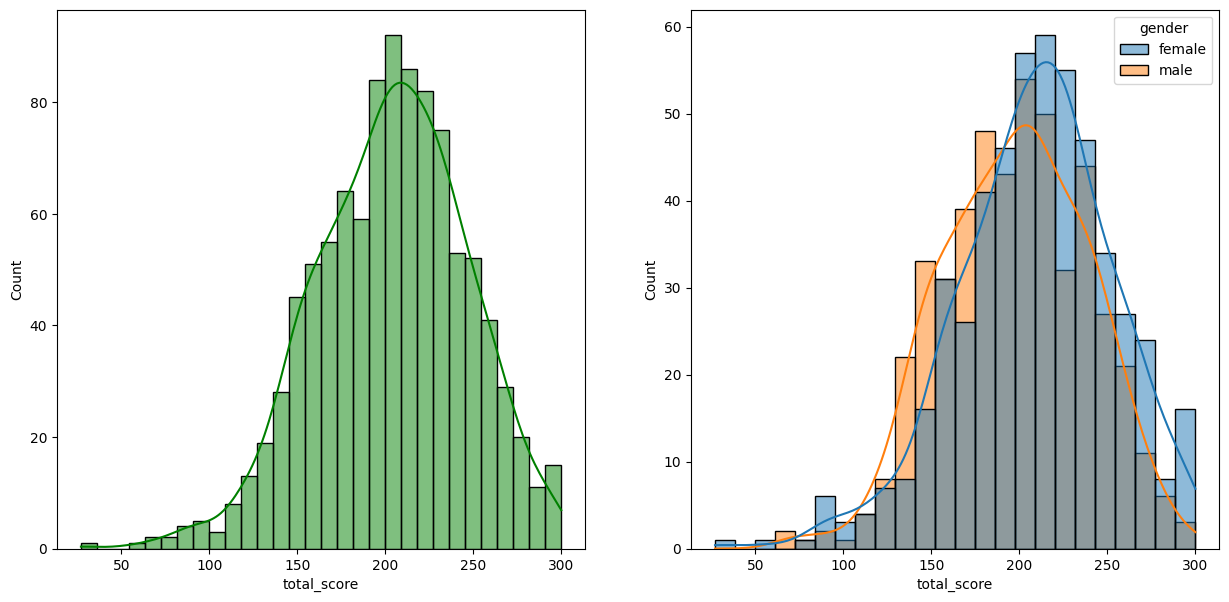

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total_score', kde=True, hue='gender')
plt.show()

##### Insights 
    - Female Students have better marks then Male Students

In [119]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='lunch')

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [60]:
data['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [68]:
data[data['parental_level_of_education'] == "master's degree"]['average'].describe()

count    59.000000
mean     73.598870
std      13.601017
min      44.666667
25%      63.166667
50%      73.333333
75%      85.500000
max      97.666667
Name: average, dtype: float64

In [73]:
data[data['parental_level_of_education'] == "bachelor's degree"]['average'].describe()

count    118.000000
mean      71.923729
std       13.946609
min       39.000000
25%       64.083333
50%       71.166667
75%       80.666667
max      100.000000
Name: average, dtype: float64

In [74]:
data[data['parental_level_of_education'] == "some high school"]['average'].describe()

count    179.000000
mean      65.108007
std       14.984078
min        9.000000
25%       55.666667
50%       66.666667
75%       76.500000
max       99.000000
Name: average, dtype: float64

In [71]:
data[data['parental_level_of_education'] == "high school"]['average'].describe()

count    196.000000
mean      63.096939
std       13.510583
min       18.333333
25%       53.916667
50%       65.000000
75%       72.666667
max       95.666667
Name: average, dtype: float64

In [75]:
data[data['parental_level_of_education'] == "associate's degree"]['average'].describe()

count    222.000000
mean      69.569069
std       13.670914
min       31.666667
25%       58.666667
50%       69.666667
75%       79.000000
max      100.000000
Name: average, dtype: float64

In [76]:
data[data['parental_level_of_education'] == "some college"]['average'].describe()

count    226.000000
mean      68.476401
std       13.710974
min       23.333333
25%       60.000000
50%       68.666667
75%       78.000000
max       99.000000
Name: average, dtype: float64

In [77]:
data['test_preparation_course'].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

<AxesSubplot: xlabel='total_score', ylabel='Count'>

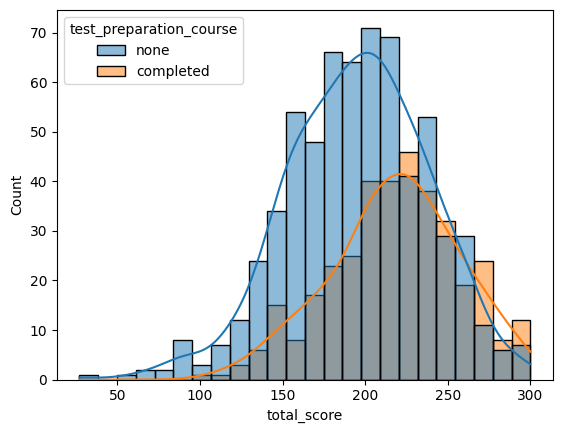

In [80]:
data['test_preparation_course'].value_counts()
sns.histplot(data=data, x='total_score', kde=True, hue='test_preparation_course')